In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"6d7f04f5-e950-47b1-9e4e-d5a9becec717\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Discretionary Desk Report\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:


pip install matplotlib

DEPRECATION: dropbox 11.25.0 has a non-standard dependency specifier stone>=2.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of dropbox or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"StartingAmount\",\"df\",\"cumulative_return\",\"drawdown\",\"df2\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd

StartingAmount = 500000

df = pd.read_excel('Dylan_Profit_Loss.xlsx')

# Rename Columns for compatibility
df['Profit'] = df['ProfitLoss']
df['Date'] = df['Date/Time']

# Drop Unneeded columns
df = df[['Profit', 'Date']]

# Get Cumulative P&L
df['CumPL'] = StartingAmount + df['Profit'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

# Create a new column called 'returnPerc'
df['rtnPerc'] = df['CumPL'].pct_change()

# Set the first value of 'returnPerc' to fill NaN
df.at[df.index[0], 'rtnPerc'] = -0.025

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the drawdown
cumulative_return = (1 + df['rtnPerc']).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Add a new column for drawdown
df['Drawdown'] = -drawdown

# Make new dataframe
df2 = df.copy()

# Remove index from df2
df2.reset_index(inplace=True)

df.head(10)


Profit 
 CumPL 
 rtnPerc 
 Drawdown 
 
 
 Date 
 
 
 
 
 
 
 
 
 2023-06-01 
 0.00 
 500000.00 
 -0.025000 
 -0.0 
 
 
 2023-06-02 
 3441.60 
 503441.60 
 0.006883 
 -0.0 
 
 
 2023-06-05 
 39.26 
 503480.86 
 0.000078 
 -0.0 
 
 
 2023-06-06 
 29207.24 
 532688.10 
 0.058011 
 -0.0 
 
 
 2023-06-07 
 5743.40 
 538431.50 
 0.010782 
 -0.0 
 
 
 2023-06-08 
 582.38 
 539013.88 
 0.001082 
 -0.0 
 
 
 2023-06-09 
 19592.00 
 558605.88 
 0.036348 
 -0.0 
 
 
 2023-06-12 
 19984.60 
 578590.48 
 0.035776 
 -0.0 
 
 
 2023-06-13 
 8720.80 
 587311.28 
 0.015072 
 -0.0 
 
 
 2023-06-14 
 31493.20 
 618804.48 
 0.053623 
 -0.0

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"cumulative_return\",\"drawdown\",\"average_drawdown\",\"drawdown_duration\",\"recovery_factor\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Calculate the average drawdown
average_drawdown = -1 * drawdown.mean()

# Calculate the average drawdown time in days
drawdown_duration = drawdown[drawdown > 0].index.to_series().diff().mean().days

# Calculate the recovery factor
recovery_factor = -1 * cumulative_return.min() / average_drawdown

# Print the portfolio statistics

print(f"Average drawdown: {average_drawdown:.2%}")
print(f"Average drawdown duration: {drawdown_duration} days")
print(f"Recovery factor: {recovery_factor:.2f}")

Average drawdown: -0.00%
Average drawdown duration: nan days
Recovery factor: inf
<ipython-input-909-6016ea40687b>:12: RuntimeWarning: divide by zero encountered in double_scalars
  recovery_factor = -1 * cumulative_return.min() / average_drawdown


In [ ]:
drawdown_duration

In [ ]:
average_drawdown

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"total_return\",\"num_years\",\"cagr\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the total return of the portfolio
total_return = df['CumPL'][-1] / df['CumPL'][0] - 1

# Calculate the number of years that the portfolio has been invested
num_years = (df.index[-1] - df.index[0]).days / 365.25

# Calculate the CAGR
cagr = (1 + total_return)**(1/num_years) - 1

print('CAGR: {:.2%}'.format(cagr))

CAGR: 156973.03%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"weekly_returns\",\"weekly_returns_df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the weekly returns
weekly_returns = df['CumPL'].resample('W').last().pct_change()

# Display the weekly returns as a DataFrame
weekly_returns_df = pd.DataFrame({'Weekly Return': weekly_returns * 100})
weekly_returns_df.head(50)

Weekly Return 
 
 
 Date 
 
 
 
 
 
 2023-06-04 
 NaN 
 
 
 2023-06-11 
 10.957434 
 
 
 2023-06-18 
 19.140901 
 
 
 2023-06-25 
 17.306227 
 
 
 2023-07-02 
 13.862292 
 
 
 2023-07-09 
 17.969056 
 
 
 2023-07-16 
 26.714541 
 
 
 2023-07-23 
 8.157652 
 
 
 2023-07-30 
 3.270216

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"weekly_returns\",\"best_week\",\"best_week_return\",\"worst_week\",\"worst_week_return\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate weekly returns
weekly_returns = df['CumPL'].resample('W').last().pct_change()

# Find the best and worst performing weeks
best_week = weekly_returns.idxmax().strftime('%B %Y')
best_week_return = weekly_returns.max()
worst_week = weekly_returns.idxmin().strftime('%B %Y')
worst_week_return = weekly_returns.min()

# Display the results
print(f"Best performing week: {best_week}, Return: {best_week_return:.2f}%")
print(f"Worst performing week: {worst_week}, Return: {worst_week_return:.2f}%")

Best performing week: July 2023, Return: 0.27%
Worst performing week: July 2023, Return: 0.03%


In [ ]:
worst_week_return

In [ ]:
best_week_return

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"top_10_drawdowns\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

df = df.reset_index()

# calculate the drawdowns
df['peak'] = df['CumPL'].cummax()
df['drawdown'] = df['CumPL'] - df['peak']
df['drawdown_pct'] = df['drawdown'] / df['peak'] * 100

# get the top 10 drawdowns
top_10_drawdowns = df.sort_values('drawdown_pct').head(10)[['Date', 'drawdown_pct']]

# rename columns
top_10_drawdowns = top_10_drawdowns.rename(columns={'Date': 'Start Date', 'drawdown_pct': 'Drawdown (%)'})

# reset index
top_10_drawdowns = top_10_drawdowns.reset_index(drop=True)

# display the table
print(top_10_drawdowns[['Start Date', 'Drawdown (%)']])

  Start Date  Drawdown (%)
0 2023-06-01           0.0
1 2023-06-30           0.0
2 2023-07-03           0.0
3 2023-07-05           0.0
4 2023-07-06           0.0
5 2023-07-07           0.0
6 2023-07-10           0.0
7 2023-07-11           0.0
8 2023-07-12           0.0
9 2023-07-13           0.0


In [ ]:
top_10_drawdowns

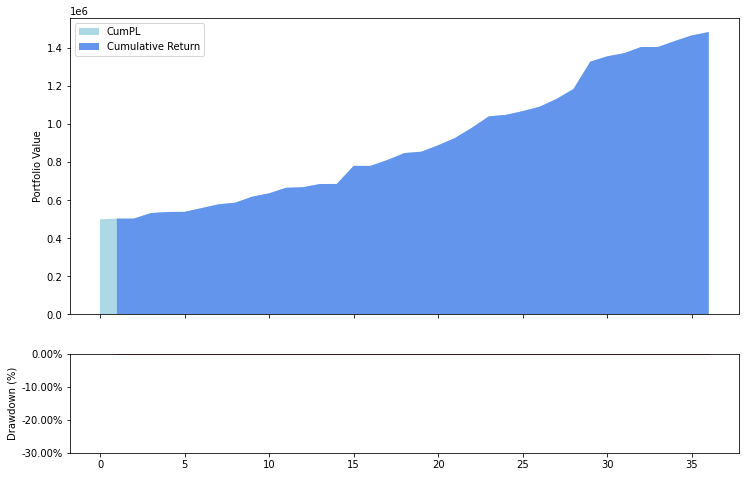

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"plt\",\"cumulative_return\",\"drawdown\",\"fig\",\"ax\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Invert the drawdown so it shows a negative number
drawdown = -1 * drawdown

# Create a stacked line plot with drawdown plot beneath it
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].stackplot(df.index, df['CumPL'], cumulative_return-df['CumPL'], labels=['CumPL', 'Cumulative Return'], colors=['lightblue', 'cornflowerblue'])
ax[1].fill_between(df.index, drawdown, 0, color='red', alpha=0.5)
ax[1].set_ylim(-0.3, 0)
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Portfolio Value')
ax[1].set_ylabel('Drawdown (%)')
ax[1].yaxis.set_major_formatter('{x:.2%}')
plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"np\",\"plt\",\"norm\",\"daily_returns\",\"cumulative_return\",\"average_daily_return\",\"std_daily_return\",\"annualized_volatility\",\"sharpe_ratio\",\"sortino_ratio\",\"var_95\",\"daily_var_95\",\"average_monthly_return\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# calculate daily returns
daily_returns = df['CumPL'].pct_change()

# calculate portfolio statistics
cumulative_return = (df['CumPL'].iloc[-1] / df['CumPL'].iloc[0]) - 1
average_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
annualized_volatility = std_daily_return * np.sqrt(252)
sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
sortino_ratio = np.sqrt(252) * (average_daily_return / daily_returns[daily_returns < 0].std())
var_95 = norm.ppf(0.05, average_daily_return, std_daily_return) * df['CumPL'].iloc[-1]
daily_var_95 = -var_95 / len(df.index)
average_monthly_return = ((1 + cumulative_return) ** (1 / len(df.index)) - 1) * 100



# display portfolio statistics
print(f"Cumulative return: {cumulative_return.item():.2%}")
print(f"Average daily return: {average_daily_return.item():.2%}")
print(f"Daily return volatility: {std_daily_return.item():.2%}")
print(f"Annualized volatility: {annualized_volatility.item():.2%}")
print(f"Sharpe ratio: {sharpe_ratio.item():.2f}")
print(f"Sortino ratio: {sortino_ratio.item():.2f}")
print(f"95% VaR (1 day): {var_95.item():.2f}")
print(f"Daily VaR (95%, 1 day): {daily_var_95.item():.2f}")
print(f"Average monthly return: {average_monthly_return:.2f}%")

Cumulative return: 196.84%
Average daily return: 3.11%
Daily return volatility: 3.06%
Annualized volatility: 48.53%
Sharpe ratio: 16.16
Sortino ratio: nan
95% VaR (1 day): -28452.85
Daily VaR (95%, 1 day): 769.00
Average monthly return: 2.98%


In [ ]:
sharpe_ratio

In [ ]:
annualized_volatility

In [ ]:
std_daily_return

In [ ]:
average_daily_return

In [ ]:
cumulative_return

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date', 'rtnPerc']]

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])



pd.to_datetime(df.index, utc=True).tz_localize(None)

df['CumPercentRet'] = df['rtnPerc'].cumsum()
df.head(15)


Date 
 rtnPerc 
 CumPercentRet 
 
 
 
 
 0 
 2023-06-01 
 -0.025000 
 -0.025000 
 
 
 1 
 2023-06-02 
 0.006883 
 -0.018117 
 
 
 2 
 2023-06-05 
 0.000078 
 -0.018039 
 
 
 3 
 2023-06-06 
 0.058011 
 0.039972 
 
 
 4 
 2023-06-07 
 0.010782 
 0.050754 
 
 
 5 
 2023-06-08 
 0.001082 
 0.051835 
 
 
 6 
 2023-06-09 
 0.036348 
 0.088183 
 
 
 7 
 2023-06-12 
 0.035776 
 0.123959 
 
 
 8 
 2023-06-13 
 0.015072 
 0.139032 
 
 
 9 
 2023-06-14 
 0.053623 
 0.192654 
 
 
 10 
 2023-06-15 
 0.028307 
 0.220962 
 
 
 11 
 2023-06-16 
 0.045899 
 0.266861 
 
 
 12 
 2023-06-20 
 0.004452 
 0.271314 
 
 
 13 
 2023-06-21 
 0.025434 
 0.296747 
 
 
 14 
 2023-06-22 
 0.000264 
 0.297012

In [ ]:
import altair
chart_df2 = altair.Chart.from_json("""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "shared"
                }
            },
            "layer": [
                {
                    "transform": [
                        {
                            "calculate": "toDate(datum[\"Date\"])",
                            "as": "Date"
                        },
                        {
                            "filter": "isValid(datum[\"Date\"])"
                        }
                    ],
                    "layer": [
                        {
                            "mark": {
                                "type": "area",
                                "point": false,
                                "line": true,
                                "clip": true,
                                "cursor": "crosshair"
                            },
                            "encoding": {
                                "opacity": {
                                    "value": 0.2
                                }
                            }
                        },
                        {
                            "mark": {
                                "type": "point",
                                "clip": true
                            },
                            "encoding": {
                                "opacity": {
                                    "value": 0,
                                    "condition": {
                                        "param": "pivot_hover_28669a29-6270-4d4f-8ecd-64a72b9bc132",
                                        "value": 1,
                                        "empty": false
                                    }
                                },
                                "size": {
                                    "value": 80
                                },
                                "y": {
                                    "field": "CumPL",
                                    "type": "quantitative",
                                    "title": "CumPL",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false
                                    },
                                    "stack": "zero"
                                }
                            }
                        },
                        {
                            "transform": [],
                            "mark": {
                                "type": "area",
                                "point": false,
                                "line": true,
                                "clip": true
                            },
                            "encoding": {}
                        },
                        {
                            "mark": {
                                "type": "rule",
                                "clip": true
                            },
                            "encoding": {
                                "opacity": {
                                    "condition": {
                                        "value": 0.3,
                                        "param": "pivot_hover_28669a29-6270-4d4f-8ecd-64a72b9bc132",
                                        "empty": false
                                    },
                                    "value": 0
                                },
                                "color": {
                                    "value": "CHART_DEFAULT_RULE_COLOR_MARKER"
                                },
                                "tooltip": [
                                    {
                                        "field": "Date",
                                        "type": "temporal",
                                        "timeUnit": "yearmonthdate"
                                    },
                                    {
                                        "field": "CumPL",
                                        "type": "quantitative",
                                        "title": "CumPL"
                                    }
                                ],
                                "y": null
                            },
                            "params": [
                                {
                                    "name": "pivot_hover_28669a29-6270-4d4f-8ecd-64a72b9bc132",
                                    "select": {
                                        "type": "point",
                                        "fields": [
                                            "yearmonthdate_Date"
                                        ],
                                        "nearest": true,
                                        "on": "mouseover",
                                        "clear": "mouseout"
                                    }
                                }
                            ]
                        }
                    ],
                    "encoding": {
                        "x": {
                            "field": "Date",
                            "type": "temporal",
                            "title": "Date (year-month-date)",
                            "scale": {},
                            "axis": {
                                "grid": true,
                                "ticks": true,
                                "tickCount": {
                                    "expr": "length(domain('x')) > 0 ? min(ceil(width / 40), ceil((domain('x')[1] - domain('x')[0]) / 86400000)) : ceil(width / 40)"
                                },
                                "labels": true,
                                "labelFlush": false
                            },
                            "timeUnit": "yearmonthdate"
                        },
                        "y": {
                            "field": "CumPL",
                            "type": "quantitative",
                            "title": "CumPL",
                            "scale": {},
                            "axis": {
                                "grid": true,
                                "ticks": true,
                                "labels": true,
                                "labelFlush": false
                            }
                        },
                        "color": {
                            "value": "#4C78A8"
                        }
                    }
                }
            ]
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {}
    }
}
""")
chart_df2.datasets.layer00 = df2.to_json(orient='records')
chart_df2.display(actions=False)